In [56]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline


In [57]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [58]:
#Creating copy to not mess w orig dataset

train_original = train.copy()
test_original = test.copy()

In [59]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [60]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [61]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [62]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [63]:
train.shape

(18288, 3)

In [64]:
test.shape

(5112, 2)

In [65]:
# Converting the datetime column from Object to a Date-time format in the Train datasets

train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [66]:
# Converting the datetime column from Object to a Date-time format in the Test datasets

test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [67]:
# extracting year, month, day, hour from the Datetime column and
# adding an additonal column for each attribute

for i in (train, test, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [68]:
# Extracting day of the week from the Date

train['day of week'] = train['Datetime'].dt.dayofweek

In [69]:
temp = train['Datetime']

In [70]:
temp.head

<bound method NDFrame.head of 0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
                ...        
18283   2014-09-25 19:00:00
18284   2014-09-25 20:00:00
18285   2014-09-25 21:00:00
18286   2014-09-25 22:00:00
18287   2014-09-25 23:00:00
Name: Datetime, Length: 18288, dtype: datetime64[ns]>

In [71]:
# Defining a function that will go through each row and assign '1' if the DayOfWeek is a weekend
# 5 = Saturday, 6 = Sunday

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return  1
    else:
        return 0


In [72]:
# Applying the above defined function to each row in the Datetime column, creating a new df named temp2

temp2 = train['Datetime'].apply(applyer)
temp2.head

<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
18283    0
18284    0
18285    0
18286    0
18287    0
Name: Datetime, Length: 18288, dtype: int64>

In [73]:
train['weekend'] = temp2
train.describe

<bound method NDFrame.describe of           ID            Datetime  Count  year  month  day  hour  day of week  \
0          0 2012-08-25 00:00:00      8  2012      8   25     0            5   
1          1 2012-08-25 01:00:00      2  2012      8   25     1            5   
2          2 2012-08-25 02:00:00      6  2012      8   25     2            5   
3          3 2012-08-25 03:00:00      2  2012      8   25     3            5   
4          4 2012-08-25 04:00:00      2  2012      8   25     4            5   
...      ...                 ...    ...   ...    ...  ...   ...          ...   
18283  18283 2014-09-25 19:00:00    868  2014      9   25    19            3   
18284  18284 2014-09-25 20:00:00    732  2014      9   25    20            3   
18285  18285 2014-09-25 21:00:00    702  2014      9   25    21            3   
18286  18286 2014-09-25 22:00:00    580  2014      9   25    22            3   
18287  18287 2014-09-25 23:00:00    534  2014      9   25    23            3   

     

In [74]:
# Getting time period on x-axis, dropping ID to get only only datetime on x-axis

train.index = train['Datetime']
df = train.drop('ID', axis=1)

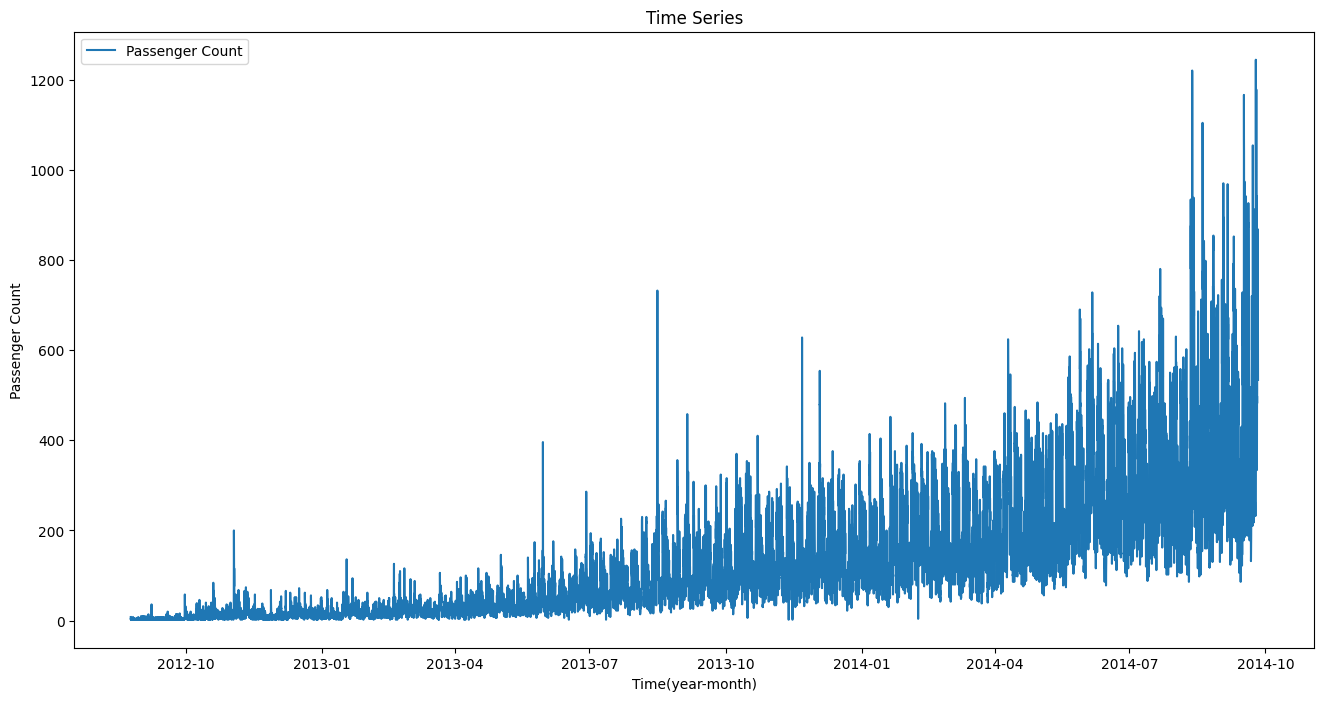

In [75]:
ts = df['Count']
plt.figure(figsize = (16, 8))
plt.plot(ts, label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

<Axes: xlabel='year'>

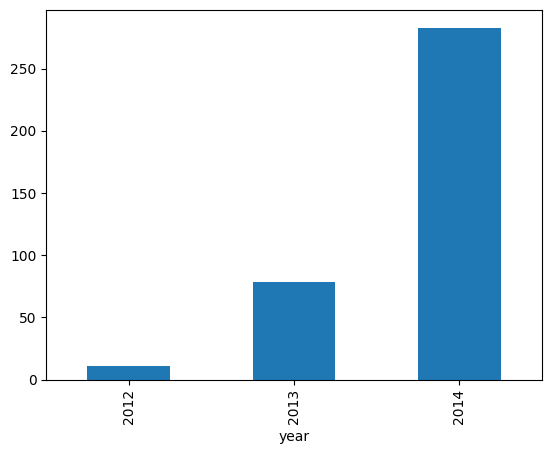

In [76]:
# looking at count year-wise

train.groupby('year')['Count'].mean().plot.bar()

# We can see that the number of passengers rise exponentially each year

<Axes: xlabel='month'>

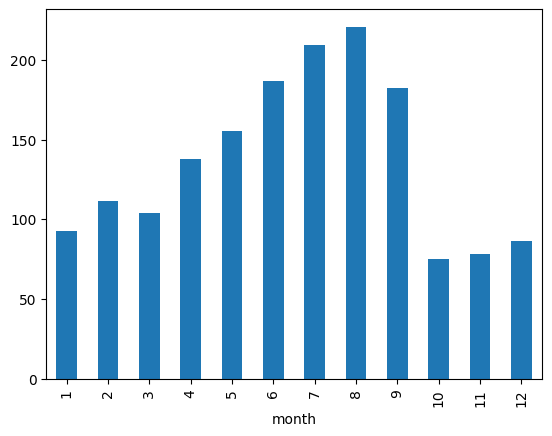

In [77]:
# looking at count month-wise (avg across years for each month)

train.groupby('month')['Count'].mean().plot.bar()

<Axes: xlabel='year,month'>

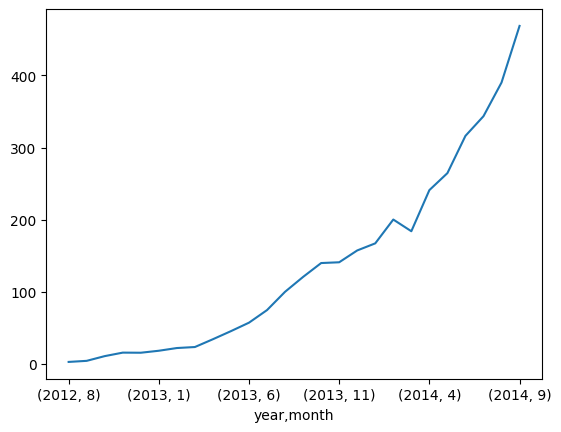

In [78]:
# Looking at moth-wise data for each month cz of dip on 10, 11, 12 above

train.groupby(['year', 'month'])['Count'].mean().plot.line()

# We dont have data for 10, 11, 12 of 2014 (when count has bveen rising). Isliye upar wala graph dipped

<Axes: xlabel='day'>

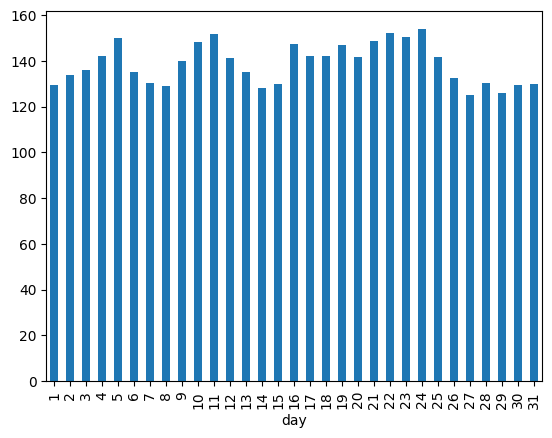

In [79]:
# looking at avg daily count (across years for each month)

train.groupby('day')['Count'].mean().plot.bar()

# kuch khaas nai

<Axes: xlabel='hour'>

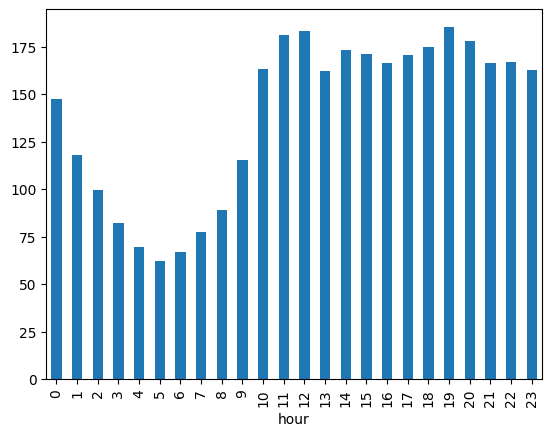

In [80]:
# looking at hourly avg count

train.groupby('hour')['Count'].mean().plot.bar()

# Peaks around noon and 7pm

<Axes: xlabel='weekend'>

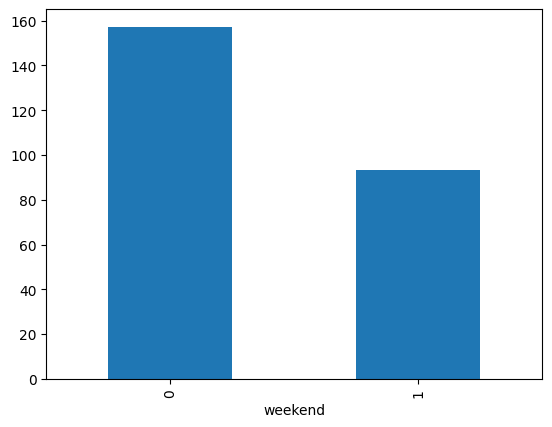

In [81]:
# checking for weekend (1) vs weekday (0) bheed

train.groupby('weekend')['Count'].mean().plot.bar()

<Axes: xlabel='day of week'>

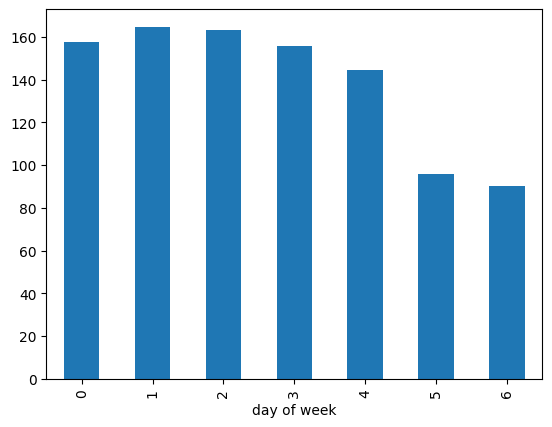

In [82]:
# looking at day-wise counts

train.groupby('day of week')['Count'].mean().plot.bar()

In [83]:
train = train.drop('ID', axis = 1)
# dropping cz useless

In [84]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')

/var/folders/tk/q2k7bw_s5wv6xs221j158ydw0000gn/T/ipykernel_1906/1795866084.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')


In [85]:
train.index = train.Timestamp

In [86]:
#Hourly time series

hourly = train.resample('H').mean(numeric_only=True)

In [87]:
#Daily time series

daily = train.resample('D').mean(numeric_only=True)

In [88]:
#Weekly time series

weekly = train.resample('W').mean(numeric_only=True)

In [89]:
#Monthly time series

monthly = train.resample('M').mean(numeric_only=True)

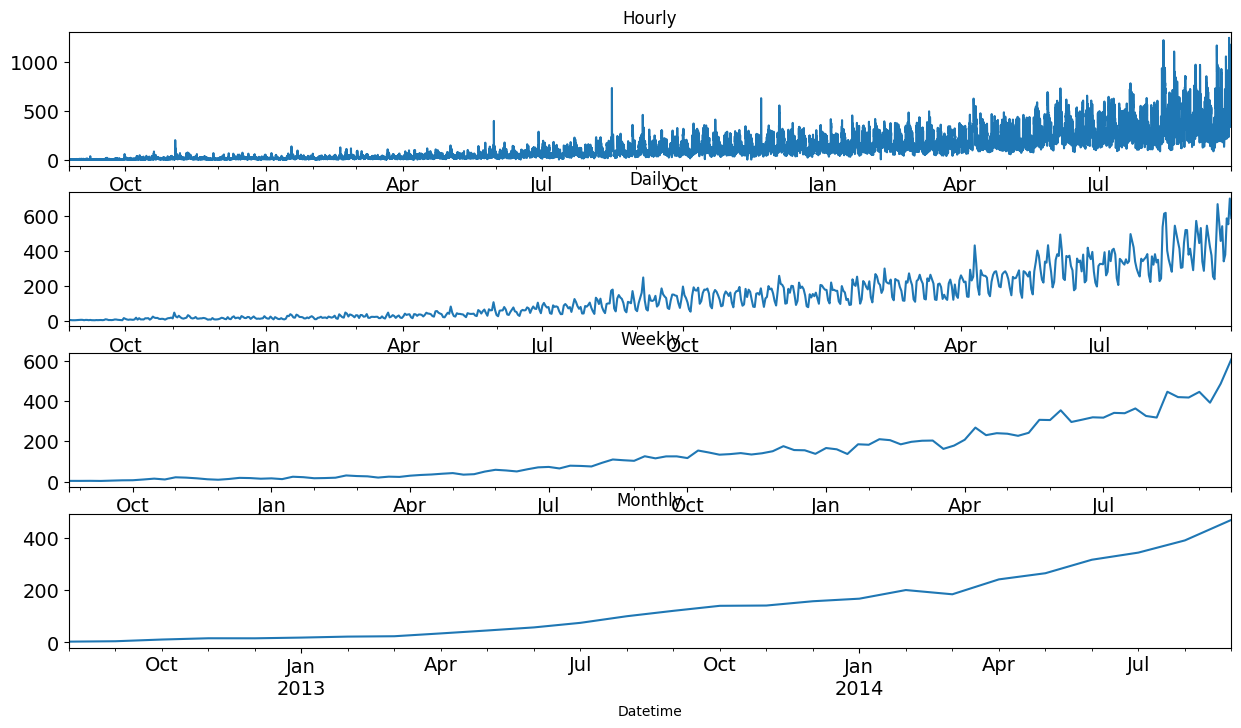

In [90]:
fig, axs = plt.subplots(4, 1)

hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='Monthly', fontsize=14, ax=axs[3])

plt.show()

#Monthly wala is the smoothest
#Will use daily wala

In [91]:
#Converting test data into daily

test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

test = test.resample('D').mean(numeric_only=True)

/var/folders/tk/q2k7bw_s5wv6xs221j158ydw0000gn/T/ipykernel_1906/4116652756.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')


In [92]:
#Converting train data into daily

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

train = train.resample('D').mean(numeric_only=True)

In [93]:
#dividing train data into train and validation sets

Train = train.loc['2012-08-25' : '2014-06-24']
validate = train.loc['2014-06-25' : '2014-09-25']

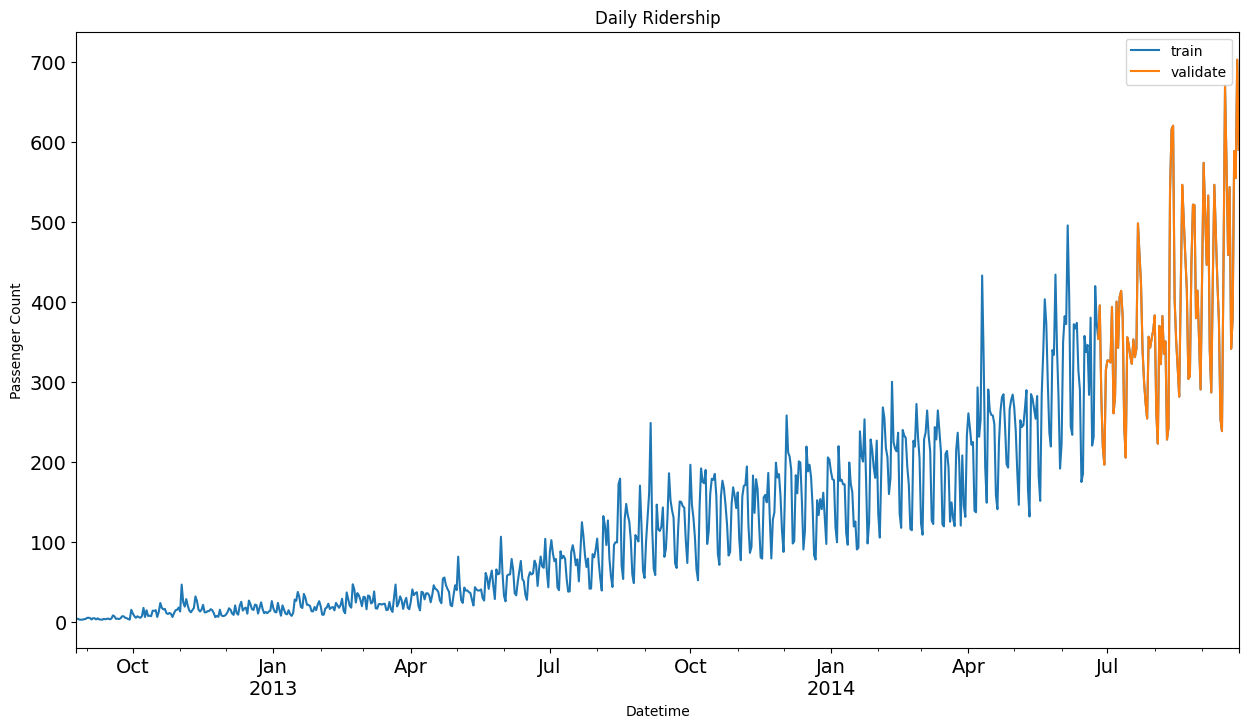

In [94]:
# PLotting training anf validation dataset

train.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'train')
validate.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'validate')
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc = 'best')

plt.show()

Forecasting using Naive approach
This approach assumews that the next point will be equal to the last observed point.

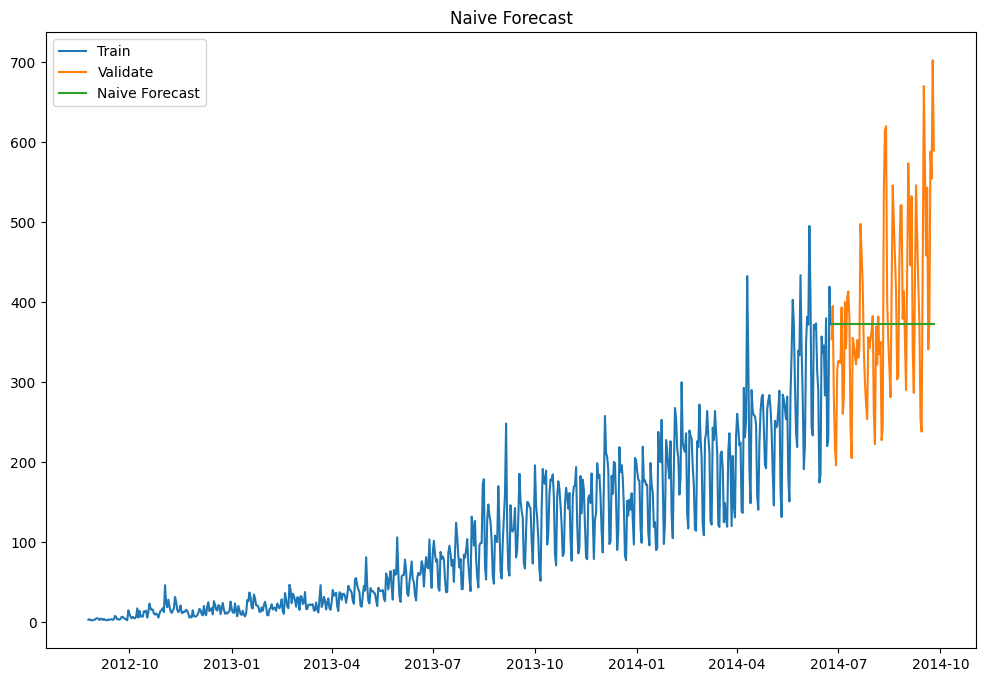

In [95]:
dd = np.asarray(Train.Count)
y_hat = validate.copy()
y_hat['naive'] = dd[len(dd)-1]

#Plotting

plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(validate.index, validate['Count'], label = 'Validate')
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive Forecast')
plt.legend(loc = 'best')
plt.title("Naive Forecast")

plt.show()

In [96]:
#Calculating Root Mean Squared Error (RMSE)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(validate.Count, y_hat.naive))
print(rmse)

111.79050467496724


Forecasting using Moving Average

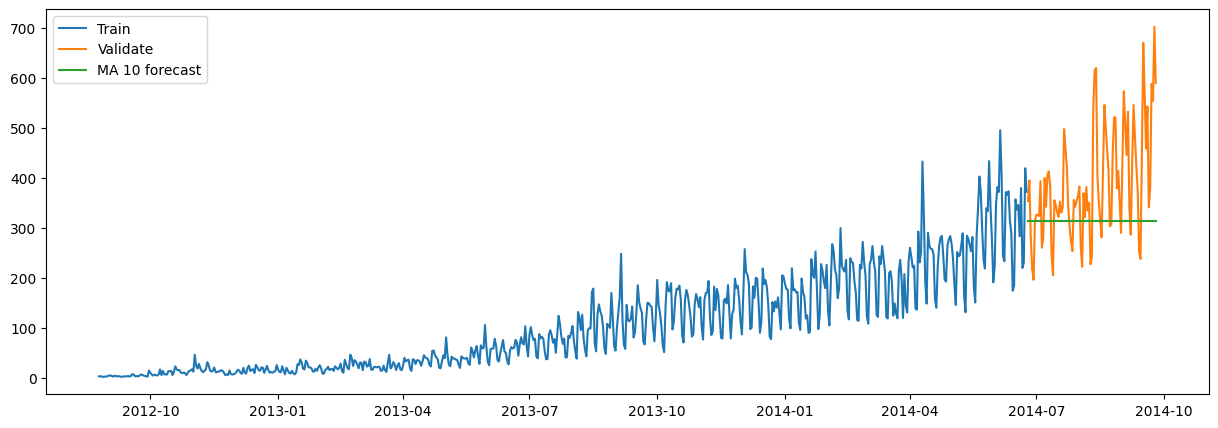

134.23733308950264


In [97]:
# Moving avg of 10

y_hat_avg = validate.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(validate['Count'], label = 'Validate')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'MA 10 forecast')
plt.legend(loc = 'best')

plt.show()

rmse = sqrt(mean_squared_error(validate.Count, y_hat_avg.moving_avg_forecast))
print(rmse)


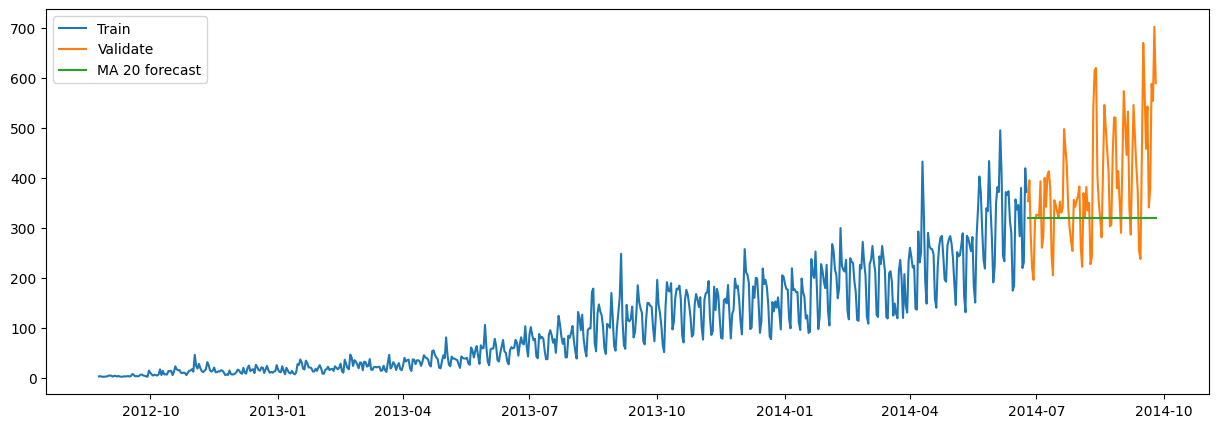

130.4498497755042


In [98]:
# Moving avg of 20

y_hat_avg = validate.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(validate['Count'], label = 'Validate')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'MA 20 forecast')
plt.legend(loc = 'best')

plt.show()

rmse = sqrt(mean_squared_error(validate.Count, y_hat_avg.moving_avg_forecast))
print(rmse)



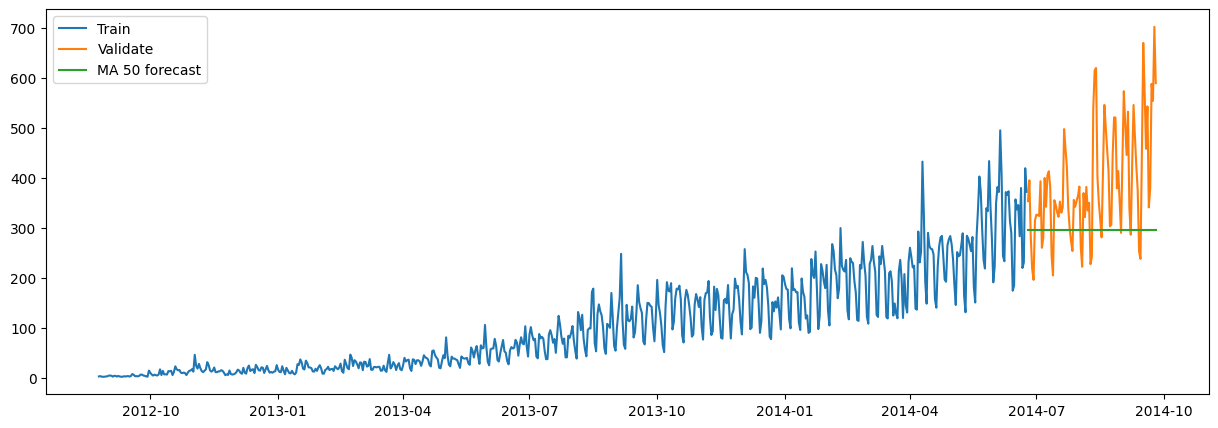

144.19175679986793


In [99]:
# Moving avg of 50

y_hat_avg = validate.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label = 'Train')
plt.plot(validate['Count'], label = 'Validate')
plt.plot(y_hat_avg['moving_avg_forecast'], label = 'MA 50 forecast')
plt.legend(loc = 'best')

plt.show()


rmse = sqrt(mean_squared_error(validate.Count, y_hat_avg.moving_avg_forecast))
print(rmse)


Forecating using Exponential Smoothing

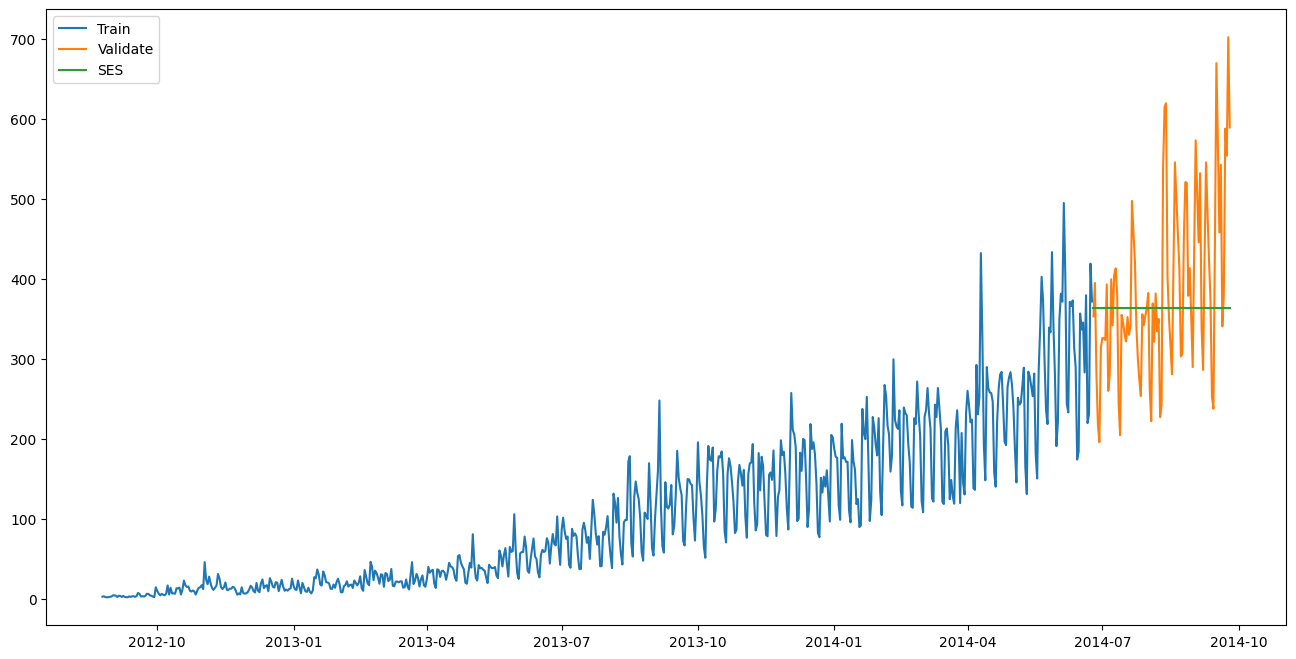

113.43708111884514


In [100]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_smth = validate.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level = 0.6, optimized = False)
y_hat_smth['SES'] = fit2.forecast(len(validate))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(validate['Count'], label = 'Validate')
plt.plot(y_hat_smth['SES'], label = 'SES')
plt.legend(loc = 'best')

plt.show()

rmse = sqrt(mean_squared_error(validate.Count, y_hat_smth.SES))
print(rmse)

Forecasting using Holt's Linear Trend Model
[Doesn't account for seasonality]

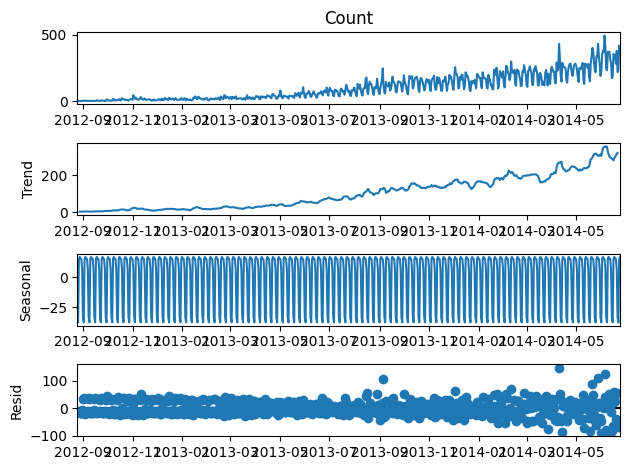

In [101]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(Train.Count)

plt.show()

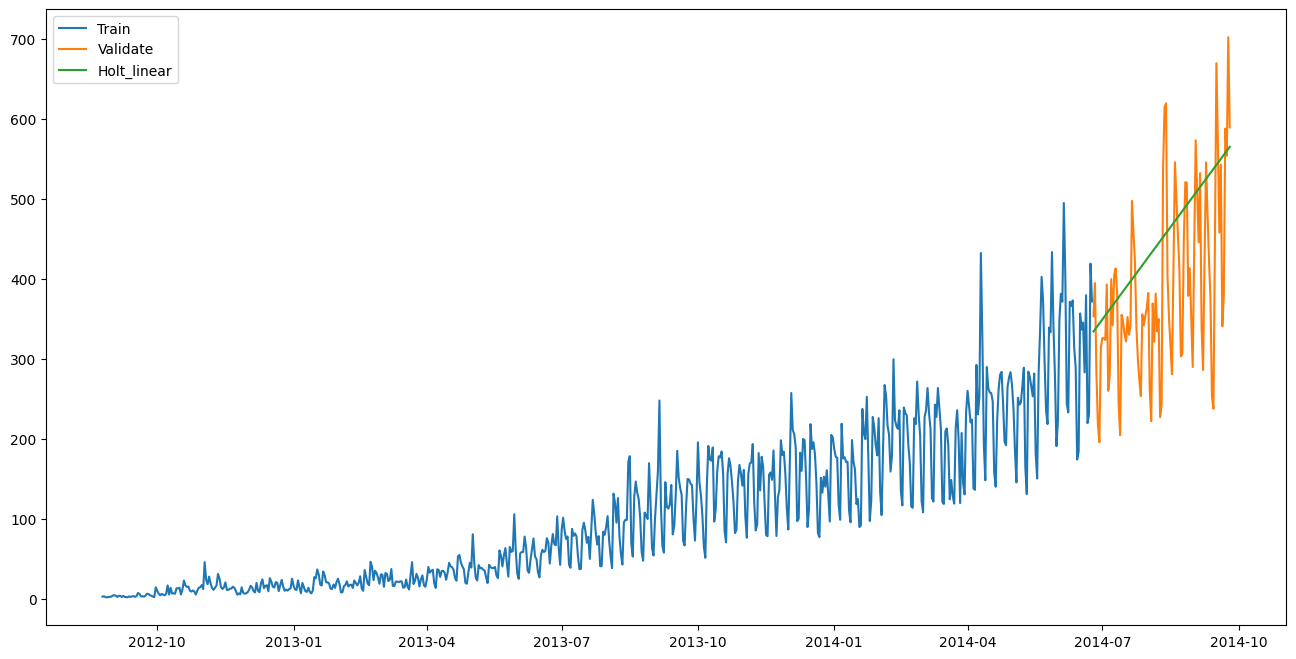

112.94278345314041


In [102]:
y_hat_holt = validate.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_trend = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(validate))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(validate['Count'], label = 'Validate')
plt.plot(y_hat_holt['Holt_linear'], label = 'Holt_linear')
plt.legend(loc = 'best')

plt.show()

rmse = sqrt(mean_squared_error(y_hat_holt.Holt_linear, validate.Count))
print(rmse)

Forecasting using Holt's Winter model
[Accounts for both trend and seasonality]

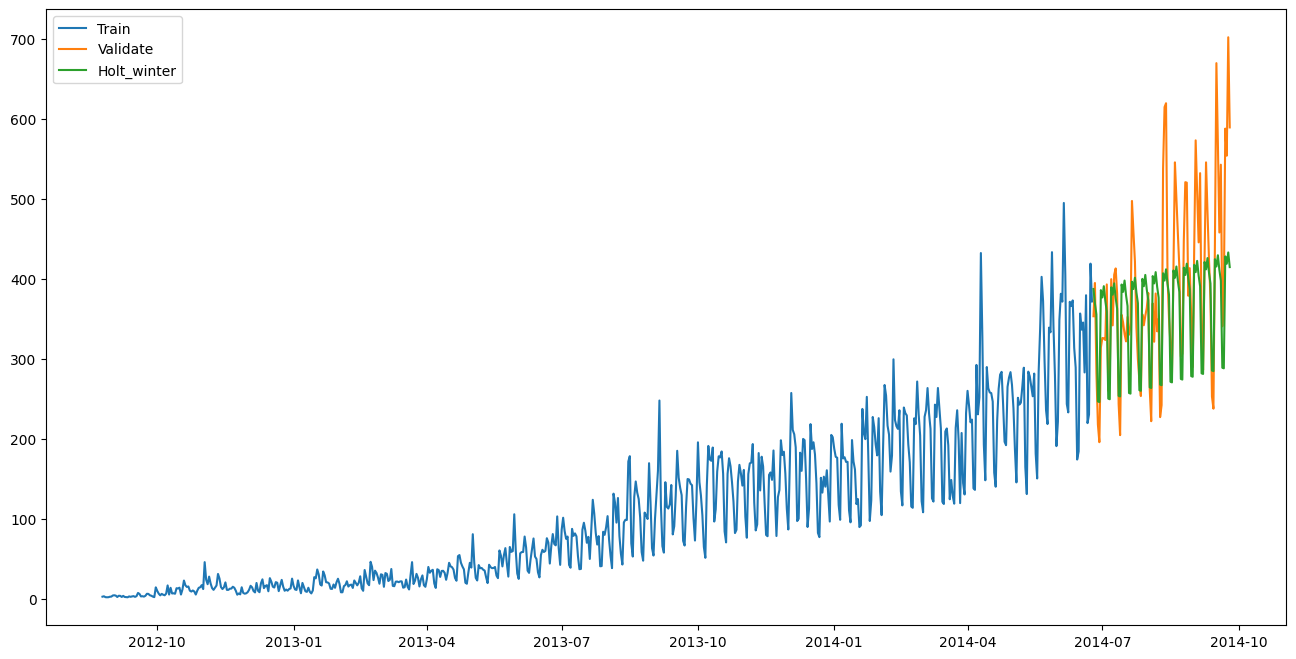

82.1808335605461


In [103]:
y_hat_holtw = validate.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods = 7, trend = 'add', seasonal = 'add').fit()
y_hat_holtw['Holt_winter'] = fit1.forecast(len(validate))

plt.figure(figsize = (16,8))
plt.plot(Train['Count'], label = 'Train')
plt.plot(validate['Count'], label = 'Validate')
plt.plot(y_hat_holtw['Holt_winter'], label = 'Holt_winter')
plt.legend(loc = 'best')

plt.show()

rmse = sqrt(mean_squared_error(y_hat_holtw.Holt_winter, validate.Count))
print(rmse)

In [104]:
# Forecasting for enire test dataset
predict = fit1.forecast(len(test))
test['prediction'] = predict


In [105]:
# Merging test and test_original on day, month and year

merge = pd.merge(test, test_original, on = ('day', 'month', 'year'), how = 'left')
merge['hour'] = merge['hour_y']
merge = merge.drop(['year', 'month', 'Datetime', 'hour_x', 'hour_y'], axis = 1)

In [106]:
# Predicting by merging merge and temp2

# prediction = pd.merge(merge, temp2, on = 'hour', how = 'left')


# Convert Series to DataFrame if necessary
temp2 = temp2.to_frame()

# Check column names in 'merge' and 'temp2' DataFrames
print("Columns in 'merge' DataFrame: ", merge.columns)
print("Columns in 'temp2' DataFrame: ", temp2.columns)

Columns in 'merge' DataFrame:  Index(['ID_x', 'day', 'prediction', 'ID_y', 'hour'], dtype='object')
Columns in 'temp2' DataFrame:  Index(['Datetime'], dtype='object')
